In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_charts():
    # test with 3/4 inch sleeve diameter
    # muscle length in inches; material description; 0psi lift from ground in inches; weight in pounds; weight lift distance in inches from ground
    data = [
        # -- 9 inch tube
        [9, "latex tube", 17.25, 0, 19.5],
        [9, "latex tube", 17.375, 2.5, 19.375],
        [9, "latex tube", 17.125, 5, 19.25],
        [9, "latex tube", 17.125, 7.5, 19.125],
        [9, "latex tube", 17.125, 10, 19],
        [9, "latex tube", 17.125, 15, 18.875],
        [9, "latex tube", 17.125, 20, 18.625],
        [9, "latex tube", 17.125, 25, 18.5],
        [9, "latex tube", 17, 30, 17.875],

        # -- 10 inch tube
        [10, "latex tube", 16.5, 0, 18.75],
        [10, "latex tube", 16.375, 2.5, 18.5],
        [10, "latex tube", 16.375, 5, 18.5],
        [10, "latex tube", 16.375, 7.5, 18.25],
        [10, "latex tube", 16.375, 10, 18.125],
        [10, "latex tube", 16.375, 15, 18.5],
        [10, "latex tube", 16.375, 20, 18.25],
        [10, "latex tube", 16.375, 25, 18.75],
        [10, "latex tube", 15.25, 30, 17.5],

        # -- 10.5 inch tube
        [10.5, "latex tube", 16, 0, 18.5],
        [10.5, "latex tube", 15.5, 2.5, 18],
        [10.5, "latex tube", 15.625, 5, 18],
        [10.5, "latex tube", 15.625, 7.5, 17.75],
        [10.5, "latex tube", 15.625, 10, 17.75],
        [10.5, "latex tube", 15.5, 15, 17.625],
        [10.5, "latex tube", 15.5, 20, 17.375],
        [10.5, "latex tube", 15.5, 25, 17.25],
        [10.5, "latex tube", 15, 30, 17],

        # -- 12 inch tube
        [12, "latex tube", 15.25, 0, 18.5],
        [12, "latex tube", 15.25, 2.5, 18.25],
        [12, "latex tube", 15.25, 5, 17.75],
        [12, "latex tube", 15, 7.5, 17.75],
        [12, "latex tube", 15, 10, 17.5],
        [12, "latex tube", 15, 15, 17.25],
        [12, "latex tube", 15, 20, 17.25],
        [12, "latex tube", 14.75, 25, 17],
        [12, "latex tube", 14.75, 30, 16.75],

        # -- 10 inch kevlar tube
        [10, "kevlar tube", 1.375, 0, 4.375],
        [10, "kevlar tube", 1.125, 2.5, 4.125],
        [10, "kevlar tube", 1.125, 5, 4],
        [10, "kevlar tube", 1.125, 7.5, 3.875],
        [10, "kevlar tube", 1, 10, 3.875],
        [10, "kevlar tube", 1, 15, 3.75],
        [10, "kevlar tube", 1, 20, 3.5],
        [10, "kevlar tube", 1, 25, 3.375],
        [10, "kevlar tube", 1, 30, 3.125],
    ]

    # Create DataFrame with derived column in one step
    df = pd.DataFrame(
        [[ml, mat, w, l1 - l0] for ml, mat, l0, w, l1 in data],
        columns=["muscle_length_in", "material", "weight_lifted_lb", "lift_change_height_in"]
    )
    
    # Create a combined series column for grouping
    # Use formatting to avoid trailing .0 on integers
    df["series"] = df["muscle_length_in"].apply(lambda x: f"{x:g}") + "\" " + df["material"]

    colors = {
        "9\" latex tube": "green",
        "10\" latex tube": "blue",
        "10.5\" latex tube": "orange",
        "12\" latex tube": "red",
        "10\" kevlar tube": "purple",
    }

    # --- main chart with polynomial fit ---
    plt.figure(figsize=(9, 5))

    for series_name, group in df.groupby("series"):
        x = group["weight_lifted_lb"]
        y = group["lift_change_height_in"]

        c = colors[series_name]

        # polynomial fit (quadratic)
        coeffs = np.polyfit(x, y, 2)
        fit = np.poly1d(coeffs)

        # generate smooth curve
        x_fit = np.linspace(x.min(), x.max(), 200)
        y_fit = fit(x_fit)

        plt.plot(x_fit, y_fit, label=f"{series_name} fit", color=c)

        # scatter raw points
        plt.scatter(x, y, label=f"{series_name} data", s=40, color=c)

    plt.title("Lift Change vs Weight (with Polynomial Fit)")
    plt.xlabel("Weight (lb)")
    plt.ylabel("Lift Change (in)")
    plt.legend(title="Muscle length & material")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    pivot = df.pivot_table(
        index="series",
        columns="weight_lifted_lb",
        values="lift_change_height_in"
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Lift Change (in) Across Weight and Muscle Length")
    plt.xlabel("Weight (lb)")
    plt.ylabel("Muscle Length & Material")
    plt.tight_layout()
    plt.show()

# test

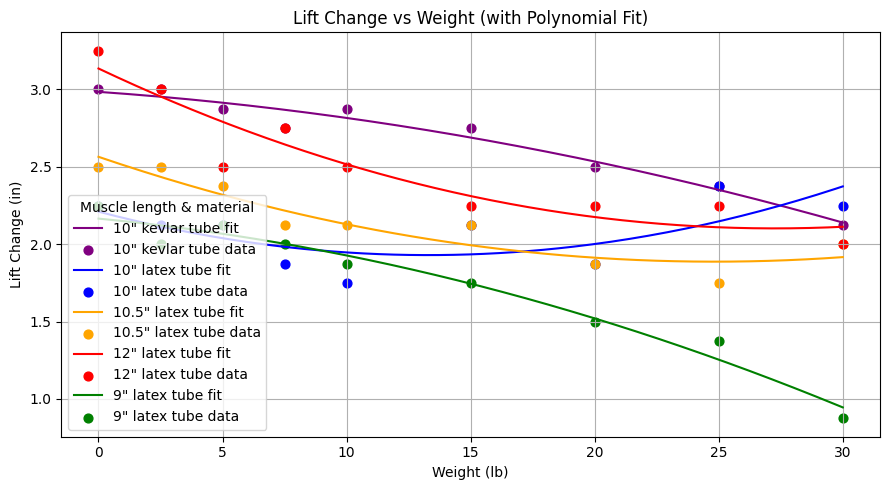

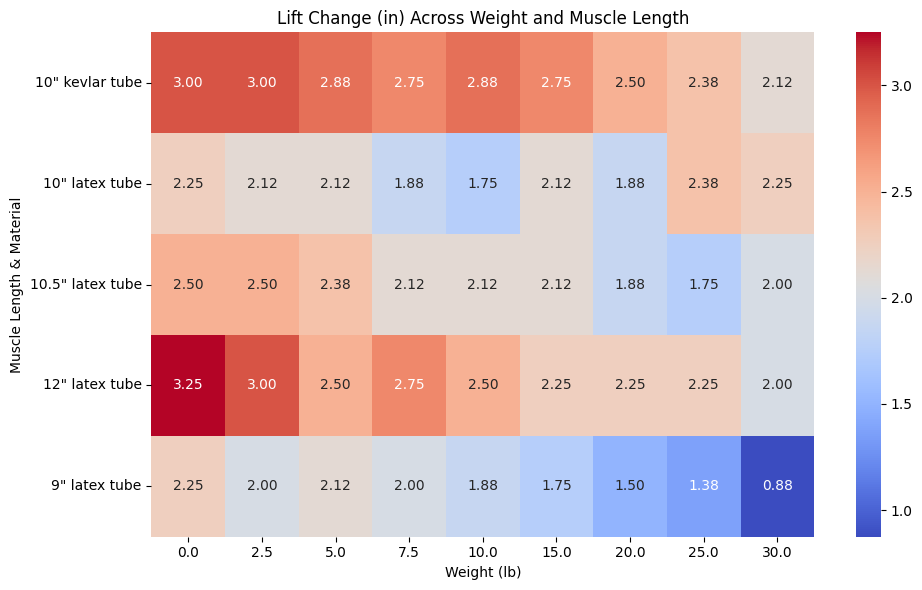

In [14]:
plot_charts()